In [2]:
import sys
sys.path.append('../')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utility.visualization_utility import plot_scatter
%pylab inline
%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


# Phylogenetic projection to 100d

In [3]:
isolates = [l.split()[0] for l in open("../data_config/distance.txt", "r").readlines()]
adist = np.array([[float(x) for x in l.split()[1::]] for l in open("../data_config/distance.txt", "r").readlines()])


amax = np.amax(adist)
adist /= amax
mds = manifold.MDS(n_components=100, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)
embeddings = results.embedding_

In [4]:
from drug_analysis.drug_relation_analysis import DrugRelation

DR = DrugRelation()
DR.make_drug_vector()

In [5]:
labeled_and_tree_ed_isolates=list(set(isolates).intersection(DR.BasicDataObj.labeled_isolates))
labeled_and_tree_ed_isolates.sort()

In [6]:
index_on_phentype_vector=[DR.BasicDataObj.labeled_isolates.index(x) for x in labeled_and_tree_ed_isolates]
index_on_phylogenetic_embedding=[isolates.index(x) for x in labeled_and_tree_ed_isolates]

## Visualization

In [7]:
def get_pca_tsne(X):    
    X_pca = PCA(n_components=50).fit_transform(X)
    X_tsne = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X)
    return X_pca, X_tsne

In [8]:
X_pca, X_tsne=get_pca_tsne(embeddings)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 508 samples in 0.001s...
[t-SNE] Computed neighbors for 508 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 508 / 508
[t-SNE] Mean sigma: 0.009557
[t-SNE] Computed conditional probabilities in 0.044s
[t-SNE] Iteration 50: error = 53.8638458, gradient norm = 0.0592993 (50 iterations in 0.366s)
[t-SNE] Iteration 100: error = 49.8002663, gradient norm = 0.0061798 (50 iterations in 0.338s)
[t-SNE] Iteration 150: error = 49.3575287, gradient norm = 0.0031014 (50 iterations in 0.338s)
[t-SNE] Iteration 200: error = 49.1865082, gradient norm = 0.0022721 (50 iterations in 0.331s)
[t-SNE] Iteration 250: error = 49.0898514, gradient norm = 0.0017936 (50 iterations in 0.327s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.089851
[t-SNE] Iteration 300: error = 0.5629371, gradient norm = 0.0055131 (50 iterations in 0.332s)
[t-SNE] Iteration 350: error = 0.3559027, gradient norm = 0.0015990 

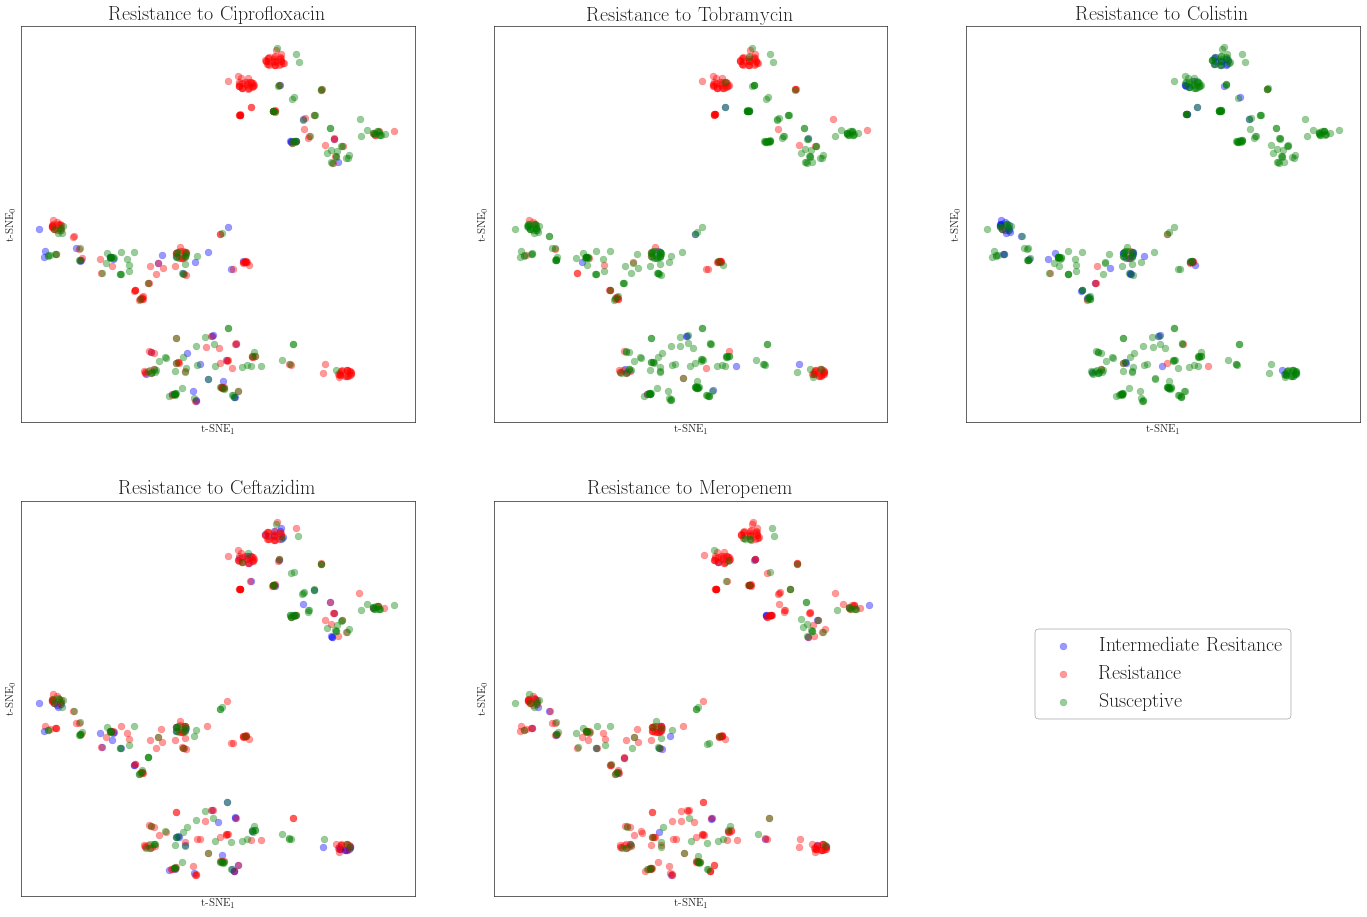

In [27]:
phenotype_dict={1:'Resistance',0.5:'Intermediate Resitance',0:'Susceptive'}
myplot=figure(figsize=(24,16))
for idx,drug in enumerate(DR.drugs):
    embedding=X_tsne[index_on_phylogenetic_embedding,:]
    Y=[phenotype_dict[x] for x in DR.drug_vectors[idx,index_on_phentype_vector]]
    ax=subplot(2,3,(idx+1))
    if idx==2:
        plot_scatter(ax, embedding, Y, 't-SNE_1', 't-SNE_0', 'Resistance to '+drug, legend_hide=False,  legend_loc=9, legend_col=1,  legend_size=20, font_s=40,label_dict=None, color_schemes_idx=0)
    else:
        plot_scatter(ax, embedding, Y, 't-SNE_1', 't-SNE_0', 'Resistance to '+drug, legend_hide=True, font_s=40,label_dict=None, color_schemes_idx=0)
    plt.title('Resistance to '+drug, fontsize=20)
    

In [28]:
myplot.savefig('../results/figures/phylogenetic_phenotype.pdf')

## Classification

In [12]:
from classifier.classical_classifiers import SVM, RFClassifier, KNN

phenotype_dict={1:'Resistance', 0.5:'Intermediate/Susceptive', 0:'Intermediate/Susceptive'}
myplot=figure(figsize=(16,24))
for idx,drug in enumerate(DR.drugs):
    print (drug,' ..')
    X_rep=embeddings[index_on_phylogenetic_embedding,:]
    Y=[phenotype_dict[x] for x in DR.drug_vectors[idx,index_on_phentype_vector]]
    print (drug,' Random Forest ..')
    MRF = RFClassifier(X_rep, Y)
    MRF.tune_and_eval('../results/classification/phylogenetic_based/'+drug+'_phylogenetic_10xfold_')
    print (drug,' SVM ..')
    MSVM = SVM(X_rep, Y)
    MSVM.tune_and_eval('../results/classification/phylogenetic_based/'+drug+'_phylogenetic_10xfold_')
    print (drug,' KNN ..')
    MKNN = KNN(X_rep, Y)
    MKNN.tune_and_eval('../results/classification/phylogenetic_based/'+drug+'_phylogenetic_10xfold_')
    

Ciprofloxacin  ..
Ciprofloxacin  Random Forest ..
Ciprofloxacin  SVM ..


/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predi

Ciprofloxacin  KNN ..
Tobramycin  ..
Tobramycin  Random Forest ..
Tobramycin  SVM ..


/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predi

Tobramycin  KNN ..
Colistin  ..
Colistin  Random Forest ..


/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predi

Colistin  SVM ..


/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predi

Colistin  KNN ..


/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predi

Ceftazidim  ..
Ceftazidim  Random Forest ..
Ceftazidim  SVM ..


/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predict

Ceftazidim  KNN ..
Meropenem  ..
Meropenem  Random Forest ..


/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Meropenem  SVM ..


/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'pre

Meropenem  KNN ..


/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/mounts/Users/student/asgari/.local/lib/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'pre

# Results

In [14]:
from utility.file_utility import FileUtility
path2res='../results/classification/snps/RF/'
files=FileUtility.recursive_glob(path2res,'*.pickle')

In [15]:
files

['../results/classification/snps/RF/Ciprofloxacin_10xfold_RvIS_RF.pickle',
 '../results/classification/snps/RF/Tobramycin_10xfold_RvIS_RF.pickle',
 '../results/classification/snps/RF/Meropenem_10xfold_RvIS_RF.pickle',
 '../results/classification/snps/RF/Colistin_10xfold_RvIS_RF.pickle',
 '../results/classification/snps/RF/Ceftazidim_10xfold_RvIS_RF.pickle']

In [16]:
def get_cv_res(filename):

    [label_set, conf, best_score_, best_estimator_,cv_results_, best_params_, pred]=FileUtility.load_obj(filename)
    res=dict()
    idx=np.argmax(cv_results_['mean_test_f1_macro'])
    res['f1_macro']=np.round(cv_results_['mean_test_f1_macro'][idx],2)
    res['f1_macro*']=str(np.round(cv_results_['mean_test_f1_macro'][idx],2))+ ' $\pm$ ' + str(np.round(cv_results_['std_test_f1_macro'][idx],2))
    res['f1_micro']=str(np.round(cv_results_['mean_test_f1_micro'][idx],2))+ ' $\pm$ ' + str(np.round(cv_results_['std_test_f1_micro'][idx],2))
    res['precision_micro']=str(np.round(cv_results_['mean_test_precision_micro'][idx],2))+ ' $\pm$ ' + str(np.round(cv_results_['std_test_precision_micro'][idx],2))
    res['precision_macro']=str(np.round(cv_results_['mean_test_precision_macro'][idx],2))+ ' $\pm$ ' + str(np.round(cv_results_['std_test_precision_macro'][idx],2))
    res['recall_micro']=str(np.round(cv_results_['mean_test_recall_micro'][idx],2))+ ' $\pm$ ' + str(np.round(cv_results_['std_test_recall_micro'][idx],2))
    res['recall_macro']=str(np.round(cv_results_['mean_test_recall_macro'][idx],2))+ ' $\pm$ ' + str(np.round(cv_results_['std_test_recall_macro'][idx],2))
    res['acc']=str(np.round(cv_results_['mean_test_accuracy'][idx],2))+ ' $\pm$ ' + str(np.round(cv_results_['std_test_accuracy'][idx],2))
    
    res['file']=file
    return res

res=dict()
for file in files:
    k=' & '.join([file.split('/')[-1].split('_')[0],file.split('/')[-1].split('_')[-1].split('.')[0]])
    s=(file.split('/')[-1].split('_')[-1])
    if k not in res:
        res[k]=dict()
        res[k][s]=get_cv_res(file)
keys=list(res.keys())
keys.sort()

for k in keys:
    try:
        keys2=[int(x) for x in list(res[k].keys())]
    except:
        keys2=list(res[k].keys())
    keys2.sort()
    max_val=-1
    max_arg=-1
    for k2 in keys2:
        k2=str(k2)
        if res[k][k2]['f1_macro']>max_val:
            max_arg=k2
            max_val=res[k][k2]['f1_macro']
    print (' & '.join([str(k), res[k][k2]['precision_micro'], res[k][k2]['recall_micro'], res[k][k2]['f1_micro'],res[k][k2]['precision_macro'],res[k][k2]['recall_macro'],res[k][k2]['f1_macro*'],res[k][k2]['acc']])+'\\\ \\hline')
    

Ceftazidim & RF & 0.65 $\pm$ 0.08 & 0.65 $\pm$ 0.08 & 0.65 $\pm$ 0.08 & 0.65 $\pm$ 0.09 & 0.65 $\pm$ 0.08 & 0.65 $\pm$ 0.09 & 0.65 $\pm$ 0.08\\ \hline
Ciprofloxacin & RF & 0.76 $\pm$ 0.03 & 0.76 $\pm$ 0.03 & 0.76 $\pm$ 0.03 & 0.76 $\pm$ 0.03 & 0.76 $\pm$ 0.03 & 0.76 $\pm$ 0.03 & 0.76 $\pm$ 0.03\\ \hline
Colistin & RF & 0.95 $\pm$ 0.0 & 0.95 $\pm$ 0.0 & 0.95 $\pm$ 0.0 & 0.48 $\pm$ 0.0 & 0.5 $\pm$ 0.0 & 0.49 $\pm$ 0.0 & 0.95 $\pm$ 0.0\\ \hline
Meropenem & RF & 0.71 $\pm$ 0.06 & 0.71 $\pm$ 0.06 & 0.71 $\pm$ 0.06 & 0.64 $\pm$ 0.17 & 0.57 $\pm$ 0.07 & 0.55 $\pm$ 0.1 & 0.71 $\pm$ 0.06\\ \hline
Tobramycin & RF & 0.91 $\pm$ 0.04 & 0.91 $\pm$ 0.04 & 0.91 $\pm$ 0.04 & 0.91 $\pm$ 0.05 & 0.88 $\pm$ 0.06 & 0.89 $\pm$ 0.05 & 0.91 $\pm$ 0.04\\ \hline


In [9]:
res

{}

## Feature vector creation

In [37]:
from scipy.sparse import csr_matrix
base_path='/mounts/data/proj/asgari/dissertation/datasets/deepbio/pseudomonas/data_v3/phylogenetic'
embeddings=csr_matrix(embeddings)
FileUtility.save_sparse_csr(base_path+'_feature_vect',embeddings)
FileUtility.save_list(base_path+'_isolates_list.txt', isolates)

FileUtility.save_list(base_path+'_feature_list.txt', [str(x) for x in range(1,101)])
